In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
 
def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')
series = read_csv('Edificio_MECO_IX.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
#print(type(series))
print(series.head())
series.plot()
pyplot.show()

Expiration Date on bill
2014-08-19    838
2014-09-19    836
2014-11-19    959
2014-12-19    979
2015-01-19    979
Name: amount in Arpesos, dtype: int64


<Figure size 640x480 with 1 Axes>

## Visualize autocorrelation : a look at the lags

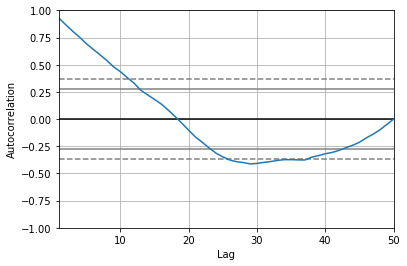

In [2]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
 
def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')
 
series = read_csv('Edificio_MECO_IX.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a n

                              ARIMA Model Results                              
Dep. Variable:     D.amount in Arpesos   No. Observations:                   49
Model:                  ARIMA(5, 1, 0)   Log Likelihood                -297.636
Method:                        css-mle   S.D. of innovations            104.834
Date:                 Mon, 29 Apr 2019   AIC                            609.273
Time:                         12:45:07   BIC                            622.516
Sample:                              1   HQIC                           614.297
                                                                               
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        38.9344      8.515      4.572      0.000      22.245      55.624
ar.L1.D.amount in Arpesos    -0.3730      0.142     -2.633      0.012      -0.

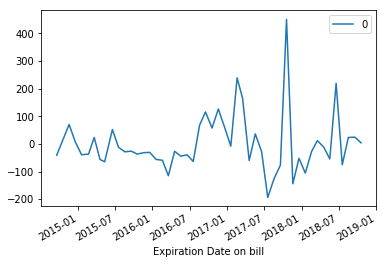

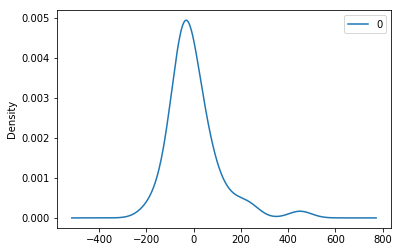

                0
count   49.000000
mean    -0.123958
std    105.972894
min   -193.325938
25%    -55.801773
50%    -27.871250
75%     24.522166
max    450.538549


In [3]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
 
def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')
 
series = read_csv('Edificio_MECO_IX.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `ar

predicted=2312.660964, expected=2151.000000
predicted=2161.794968, expected=2025.000000
predicted=2091.510213, expected=2025.000000
predicted=2028.851332, expected=2023.000000
predicted=1991.489873, expected=2568.000000
predicted=2760.329143, expected=2314.000000
predicted=2412.934183, expected=2358.000000
predicted=2414.800372, expected=2274.000000
predicted=2370.737087, expected=2272.000000
predicted=2410.447070, expected=2411.000000
predicted=2418.957500, expected=2418.000000
predicted=2479.685129, expected=2430.000000
predicted=2457.911794, expected=2697.000000
predicted=2650.079837, expected=2564.000000
predicted=2645.469818, expected=2672.000000
predicted=2681.251454, expected=2709.000000
predicted=2717.419854, expected=2722.000000
Test MSE: 40118.099


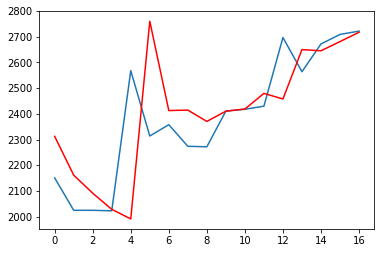

In [5]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')
 
series = read_csv('Edificio_MECO_IX.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()